In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

In [8]:
# Adjust path if needed
credit_card_data = pd.read_csv(r"../creditcard.csv")
print("Dataset Loaded Successfully ✅")

Dataset Loaded Successfully ✅


In [9]:
print(credit_card_data.shape)
print(credit_card_data["Class"].value_counts())

(284807, 31)
Class
0    284315
1       492
Name: count, dtype: int64


In [10]:
print(credit_card_data.shape)
print(credit_card_data["Class"].value_counts())

(284807, 31)
Class
0    284315
1       492
Name: count, dtype: int64


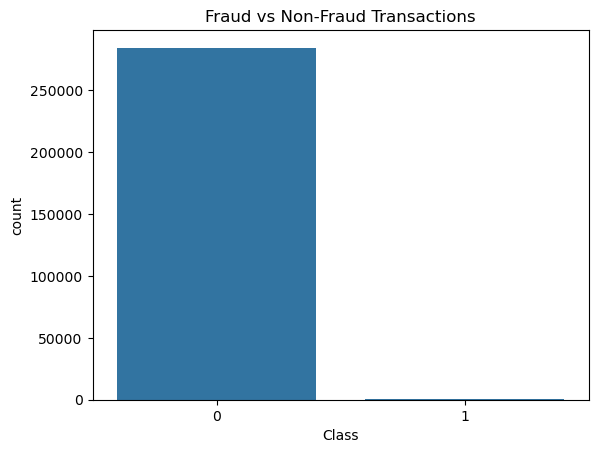

In [11]:
# Count plot
sns.countplot(x="Class", data=credit_card_data)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

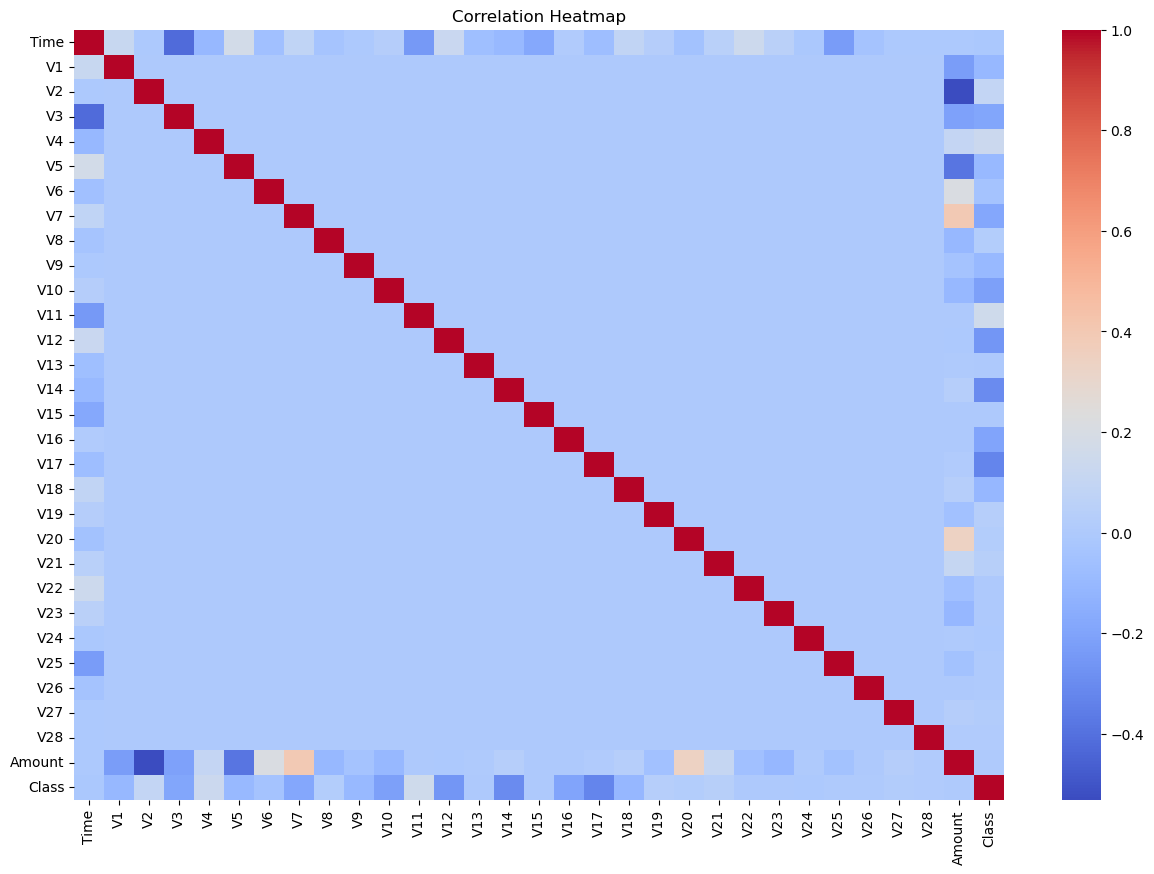

In [12]:
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(credit_card_data.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [13]:
# Features and target
X = credit_card_data.drop("Class", axis=1)
y = credit_card_data["Class"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = DecisionTreeClassifier()

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)

In [16]:
acc1 = accuracy_score(y_test, y_pred1)
prec1 = precision_score(y_test, y_pred1)
rec1 = recall_score(y_test, y_pred1)
f1_1 = f1_score(y_test, y_pred1)

acc2 = accuracy_score(y_test, y_pred2)
prec2 = precision_score(y_test, y_pred2)
rec2 = recall_score(y_test, y_pred2)
f1_2 = f1_score(y_test, y_pred2)

acc3 = accuracy_score(y_test, y_pred3)
prec3 = precision_score(y_test, y_pred3)
rec3 = recall_score(y_test, y_pred3)
f1_3 = f1_score(y_test, y_pred3)

In [17]:
results = pd.DataFrame(
    {
        "Model": ["Logistic Regression", "KNN", "Decision Tree"],
        "Accuracy": [acc1, acc2, acc3],
        "Precision": [prec1, prec2, prec3],
        "Recall": [rec1, rec2, rec3],
        "F1 Score": [f1_1, f1_2, f1_3]
    }
)



print("🔍 Model Comparison:")


print(results.sort_values(by="F1 Score", ascending=False))

🔍 Model Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score
1                  KNN  0.999544   0.918605  0.806122  0.858696
2        Decision Tree  0.999034   0.708738  0.744898  0.726368
0  Logistic Regression  0.999140   0.826667  0.632653  0.716763
